<a href="https://colab.research.google.com/github/MuhammadHassan667410/ArchTechnology_MLinternship_Tasks/blob/main/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['Category', 'Message']] # type: ignore
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [ ]:

def clean_text(text): # type: ignore
    text = text.lower() # type: ignore
    text = re.sub(r'\d+', '', text) # type: ignore
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:

df['clean_msg'] = df['Message'].apply(clean_text) # type: ignore

In [ ]:
# Split dataset
X = df['clean_msg']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = { # type: ignore
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:
results = []

for name, model in models.items(): # type: ignore
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train) # type: ignore
    y_pred = pipeline.predict(X_test) # type: ignore

    acc = accuracy_score(y_test, y_pred) # type: ignore
    f1 = f1_score(y_test, y_pred) # type: ignore

    print(f"🔹 {name} 🔹")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred)) # type: ignore
    print("="*60)

    results.append((name, acc, f1, pipeline, y_pred))

🔹 Logistic Regression 🔹
Accuracy: 0.9632
F1 Score: 0.8405
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

🔹 Naive Bayes 🔹
Accuracy: 0.9668
F1 Score: 0.8582
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

🔹 SVM 🔹
Accuracy: 0.9892
F1 Score: 0.9583
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1   

In [ ]:
# Choose best model by F1 Score
best_model = max(results, key=lambda x: x[2]) # type: ignore
best_name, best_acc, best_f1, best_pipeline, best_y_pred = best_model

In [ ]:
print(f"\n✅ Best Model: {best_name} | Accuracy: {best_acc:.4f} | F1 Score: {best_f1:.4f}")


✅ Best Model: SVM | Accuracy: 0.9892 | F1 Score: 0.9583


Text(50.722222222222214, 0.5, 'Actual')

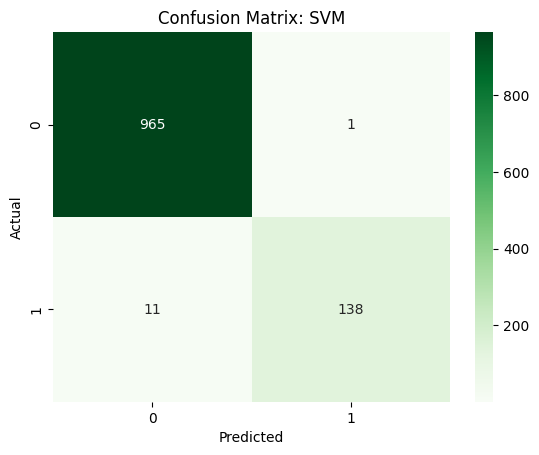

In [ ]:
# Plot confusion matrix for best model
cm = confusion_matrix(y_test, best_y_pred)# type: ignore
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens') # type: ignore
plt.title(f"Confusion Matrix: {best_name}") # type: ignore
plt.xlabel("Predicted")# type: ignore
plt.ylabel("Actual")# type: ignore


In [ ]:
joblib.dump(best_pipeline, "best_spam_model.pkl")# type: ignore
print(f"📦 Saved best model as 'best_spam_model.pkl'")

📦 Saved best model as 'best_spam_model.pkl'
